# Our objective is to identify the customers,with enough potential to sell our products.Thus we would analyse all customers and only approach a certain set of people for our sales.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#reading the data
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Lets use this data set to segregate the customers on into different clusters by analysing their Income and expenditure

In [9]:
X=dataset.iloc[:,[3,4]].values


WCSS is a parameter that's used to select an optimal no.of clusters among the available data.
cl.inertia_ stores the wcss value correspoding to a particular no.of clusters.
k_means++ is used to avoid the random initialization trap ,it helps in using some good techniques that enable us to choose right set of initial points

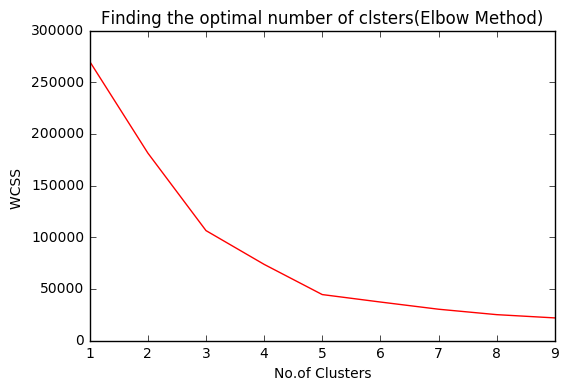

In [40]:
#applying clustering algorithms on this data
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,10):
    cl=KMeans(init='k-means++',n_clusters=i,n_init=10,max_iter=300)
    pred=cl.fit(X)
    wcss.append(cl.inertia_)

plt.plot(np.arange(1,10,1),wcss,color='red')

plt.xlabel("No.of Clusters")
plt.ylabel("WCSS ")
plt.title("Finding the optimal number of clsters(Elbow Method)")
plt.show()

Clearly WCSS signigicatly diminished at no.of clusters=5 and 3 
Ultimate motive should be to select a smaller WCSS so 5 would be a good choice

In [65]:
cl=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300)
y_pred=cl.fit_predict(X)
#this is used for clustering purpose

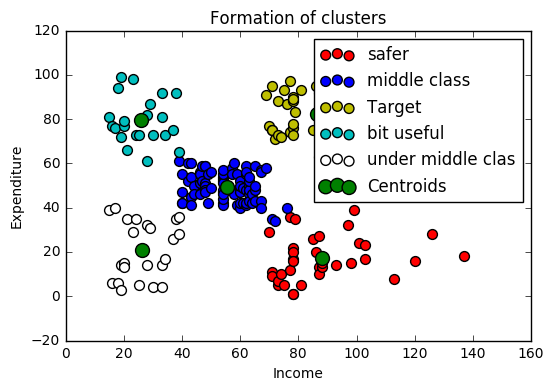

In [68]:
#visualization of result using the plot between salary and expenditure

plt.scatter(X[y_pred==0,[0]],X[y_pred==0,[1]],c='r',s=50,label='safer')
plt.scatter(X[y_pred==1,[0]],X[y_pred==1,[1]],c='b',s=50,label='middle class')
plt.scatter(X[y_pred==2,[0]],X[y_pred==2,[1]],c='y',s=50,label='Target')
plt.scatter(X[y_pred==3,[0]],X[y_pred==3,[1]],c='c',s=50,label='bit useful')
plt.scatter(X[y_pred==4,[0]],X[y_pred==4,[1]],c='w',s=50,label='under middle clas')
plt.scatter(cl.cluster_centers_[:,0],cl.cluster_centers_[:,1],s=100,label='Centroids',c='g')
plt.legend()
plt.xlabel("Income")
plt.ylabel("Expenditure")
plt.title("Formation of clusters")
plt.show()

# Clustering using Hierarchial clustering technique

In [1]:
#importin libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


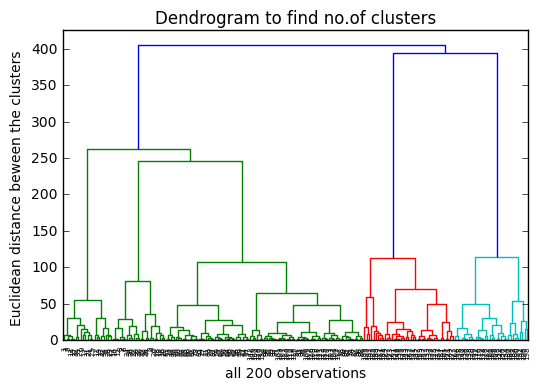

In [31]:

X=dataset.iloc[:,[3,4]].values
#finding the optimal no.of clusters by using dendrograms
import scipy.cluster.hierarchy as sch # dendrogram,linkage refers to the criterion used to evaluate the distance between two points to infer about similarities
#dendrogram is to draw visual representation that helps  in identifying the idea no.of clusters
den=sch.dendrogram(sch.linkage(X,"ward"))
#this linkage=ward signifies that while combining two cluster the variance is kept low 
plt.title("Dendrogram to find no.of clusters")
plt.xlabel("all 200 observations")
plt.ylabel("Euclidean distance beween the clusters ")
plt.show()

By observing the denrdrogram appropriate no.of clusters would be 5 


# Hierarchial clustering is of two types i)Agglomarative ii)Devisive 
The following is Agglomarative

In [32]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=5,linkage='ward')
y_pred=ac.fit_predict(X)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], dtype=int32)

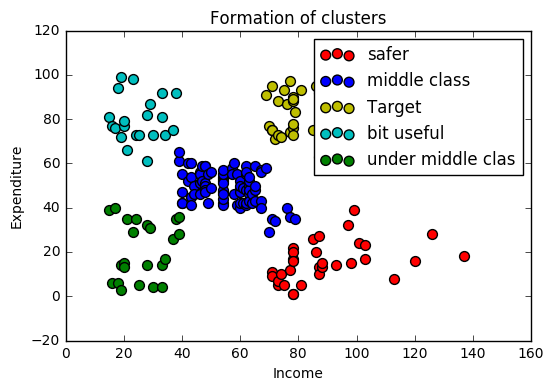

In [40]:
#visualization of result using the plot between salary and expenditure

plt.scatter(X[y_pred==0,[0]],X[y_pred==0,[1]],c='r',s=50,label='safer')
plt.scatter(X[y_pred==1,[0]],X[y_pred==1,[1]],c='b',s=50,label='middle class')
plt.scatter(X[y_pred==2,[0]],X[y_pred==2,[1]],c='y',s=50,label='Target')
plt.scatter(X[y_pred==3,[0]],X[y_pred==3,[1]],c='c',s=50,label='bit useful')
plt.scatter(X[y_pred==4,[0]],X[y_pred==4,[1]],c='g',s=50,label='under middle clas')
plt.legend()
plt.xlabel("Income")
plt.ylabel("Expenditure")
plt.title("Formation of clusters")
plt.show()